In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
life = pd.read_csv("all_data.csv")
print(life.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [80]:
#Find out how many countries are on data set
country_counts = life['Country'].value_counts()
print(country_counts)

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [81]:
#group each country individually

country_data = {}

for country, group in life.groupby('Country'):
    country_data[country] = group

print(country_data)

{'Chile':    Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  201

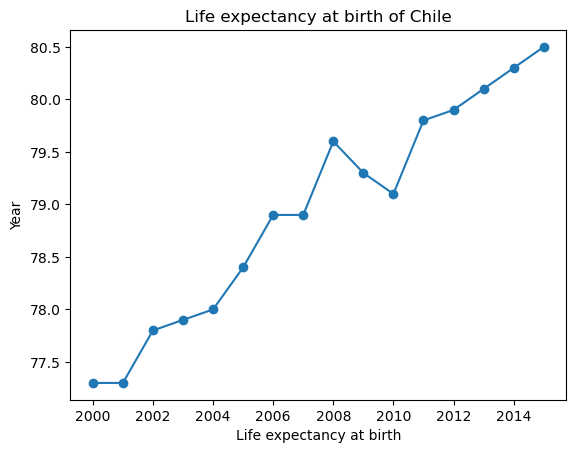

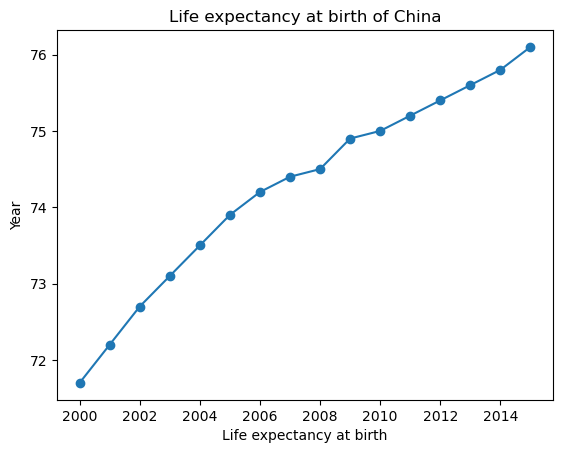

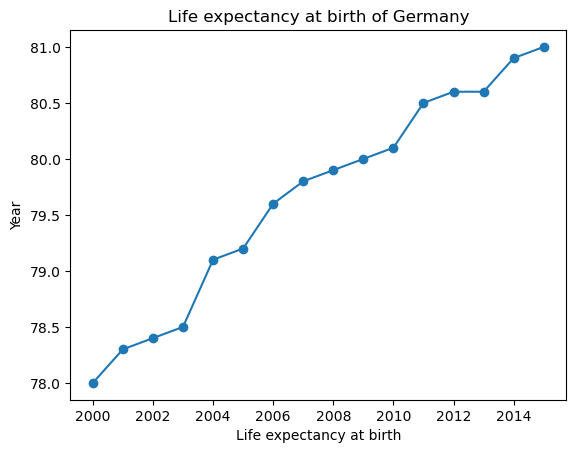

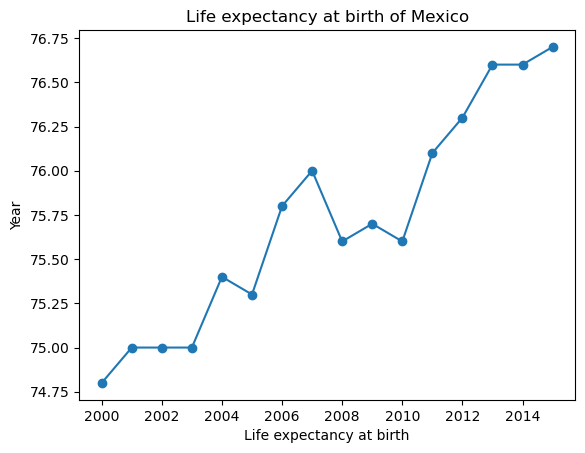

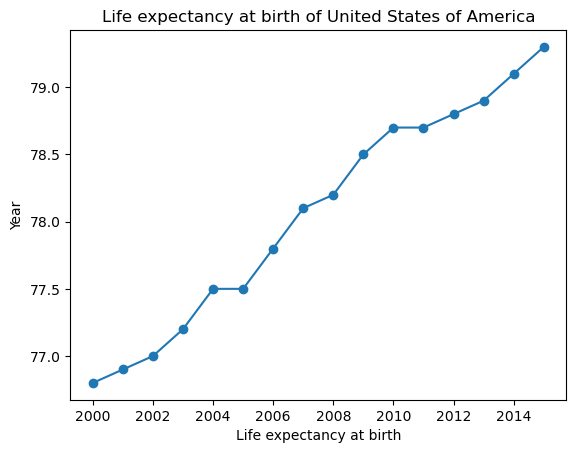

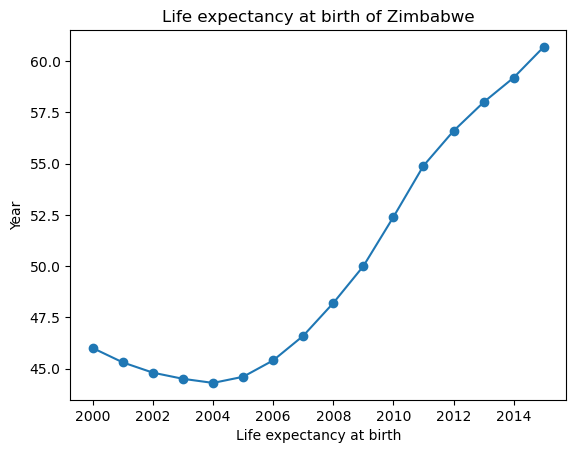

<Figure size 640x480 with 0 Axes>

In [82]:
# Use for loop to plotting a line graph for Life expectancy at birth of each country

for i in country_data:
    x_values = country_data[i]['Year']
    y_values = country_data[i]['Life expectancy at birth (years)']
    plt.plot(x_values, y_values, marker='o')
    plt.title(str("Life expectancy at birth of " + str(i)))
    plt.xlabel('Life expectancy at birth')
    plt.ylabel('Year')
    plt.show()
    plt.clf()


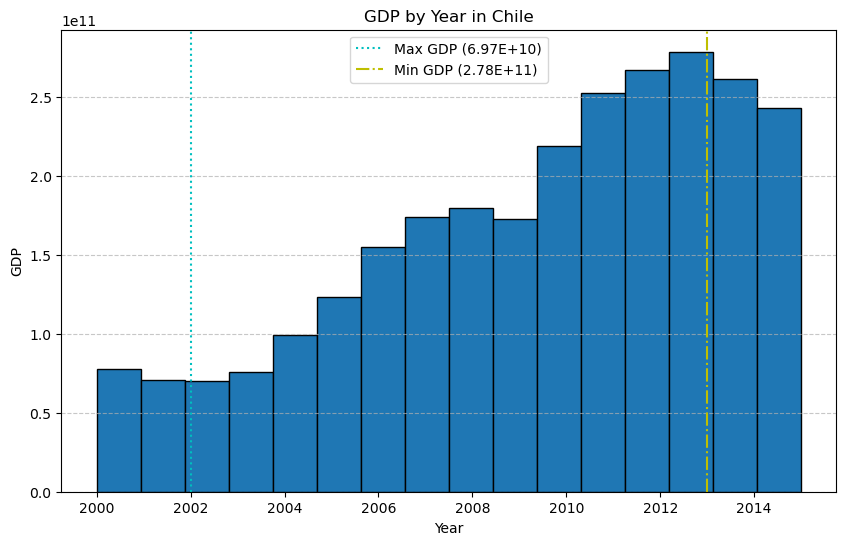

<Figure size 640x480 with 0 Axes>

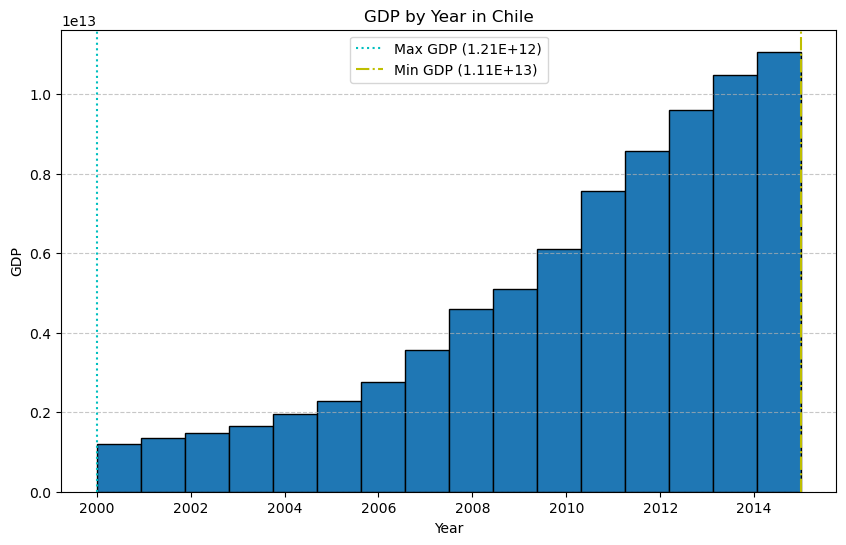

<Figure size 640x480 with 0 Axes>

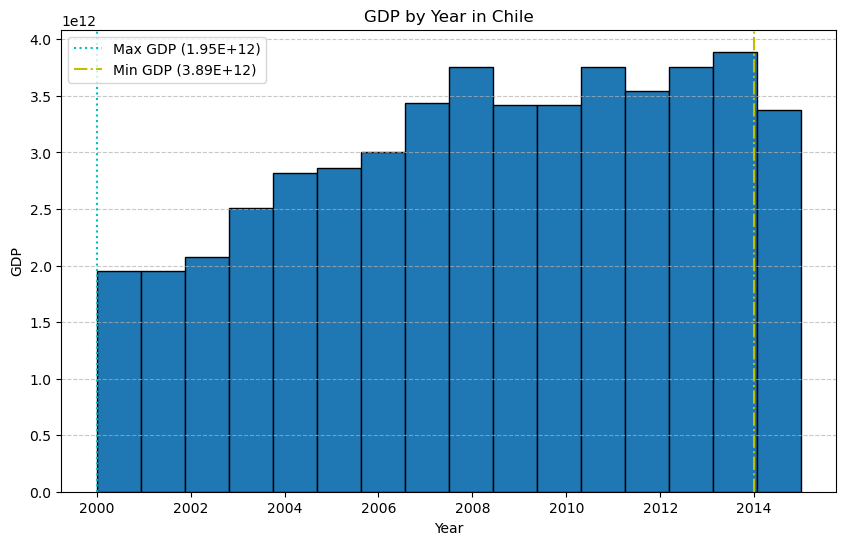

<Figure size 640x480 with 0 Axes>

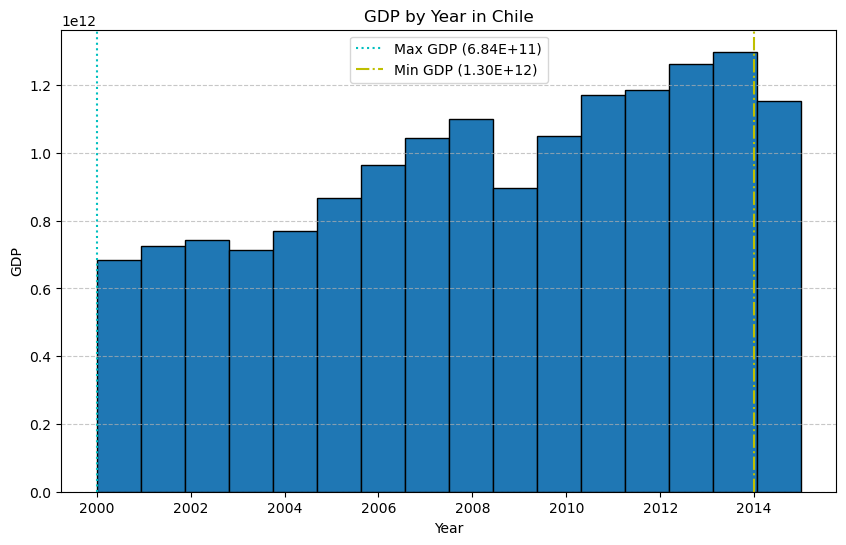

<Figure size 640x480 with 0 Axes>

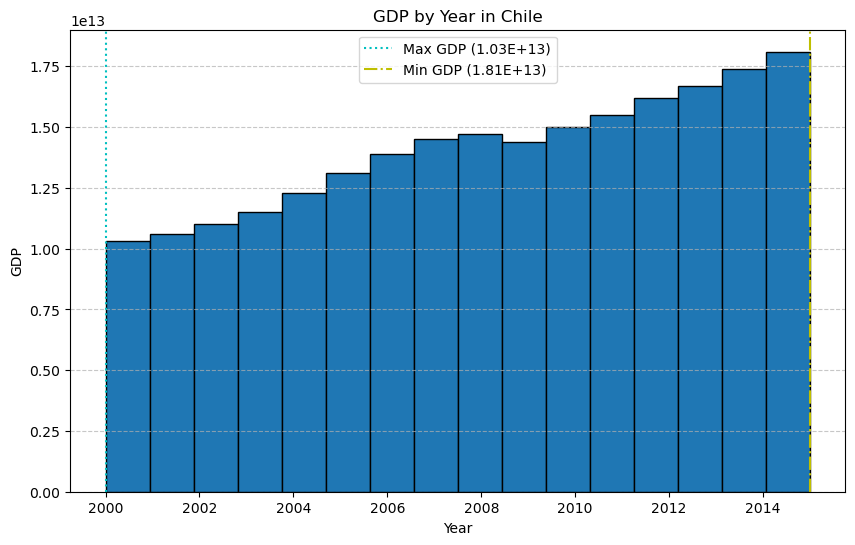

<Figure size 640x480 with 0 Axes>

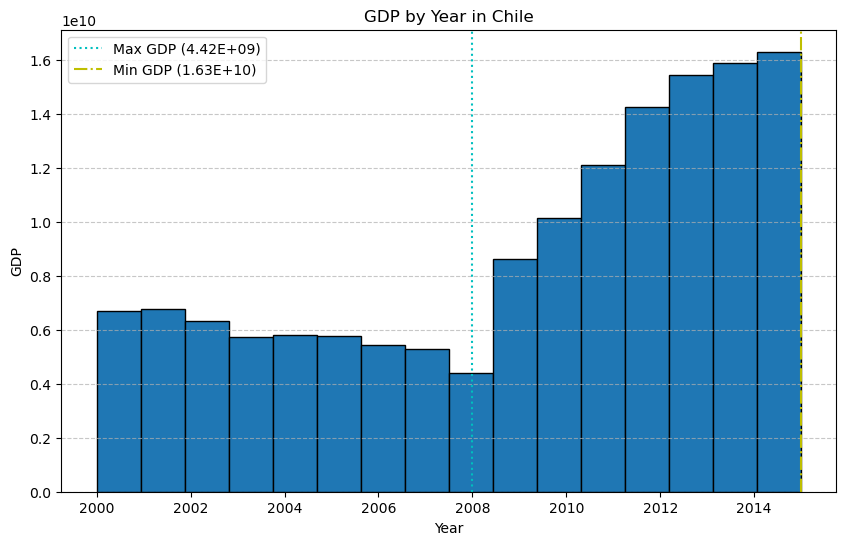

<Figure size 640x480 with 0 Axes>

In [83]:
# Plot histogram showing GDP by year for each country

for c in country_data:
    
#Create a list individually
    country = life[life['Country'] == c]
    

    #plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(country['Year'], bins=16, weights=country['GDP'], edgecolor='k')
    plt.title('GDP by Year in Chile')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    #Calculate & draw a line for MIN, MAX of GDP
    min_gdp = country['GDP'].max()
    max_gdp = country['GDP'].min()
    plt.axvline(x = country[country['GDP'] == max_gdp]['Year'].values[0], color = 'c', linestyle = ':', label=f'Max GDP ({max_gdp:.2E})')
    plt.axvline(x = country[country['GDP'] == min_gdp]['Year'].values[0], color = 'y', linestyle = '-.', label=f'Min GDP ({min_gdp:.2E})')


    plt.legend()
    plt.show()
    plt.clf()

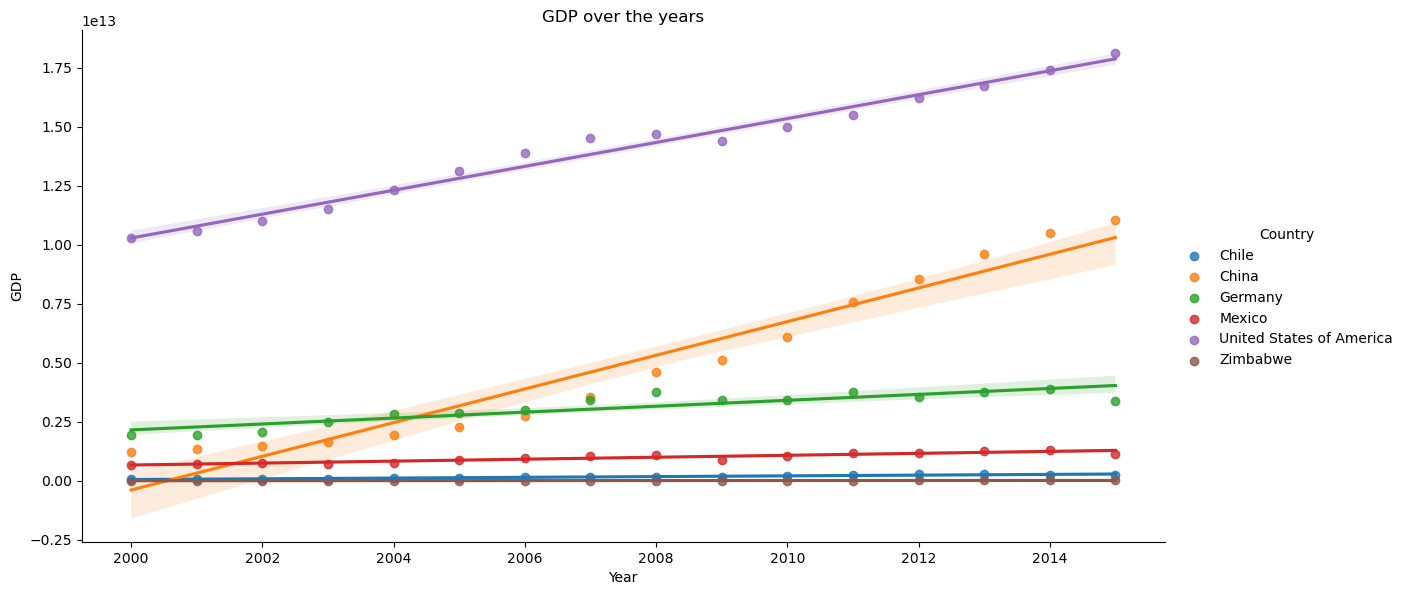

In [84]:
#calculating GDP of each counry over the years
sns.lmplot(x = 'Year', y = 'GDP', hue = 'Country' , data = life, height=6, aspect=2)
plt.title('GDP over the years')
plt.show()
plt.close()

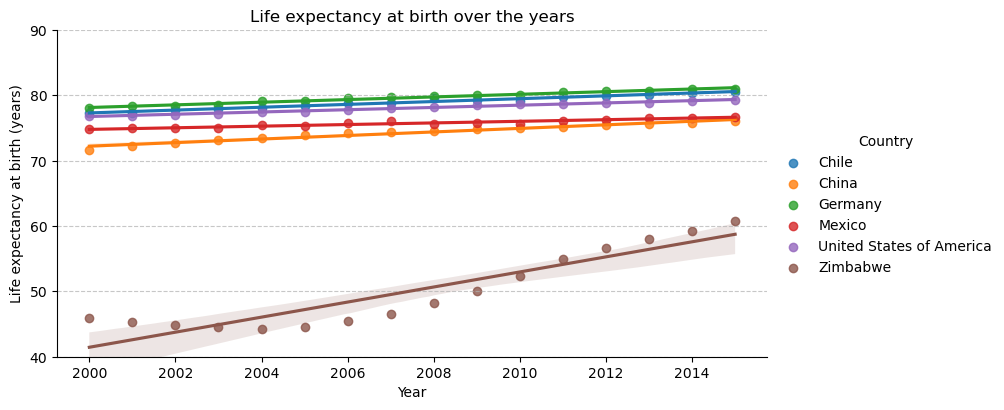

In [85]:
#calculating Life expectancy at birth of each counry over the years
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country' , data = life, height=4, aspect=2)
plt.ylim(40, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Life expectancy at birth over the years')
plt.show()
plt.close()

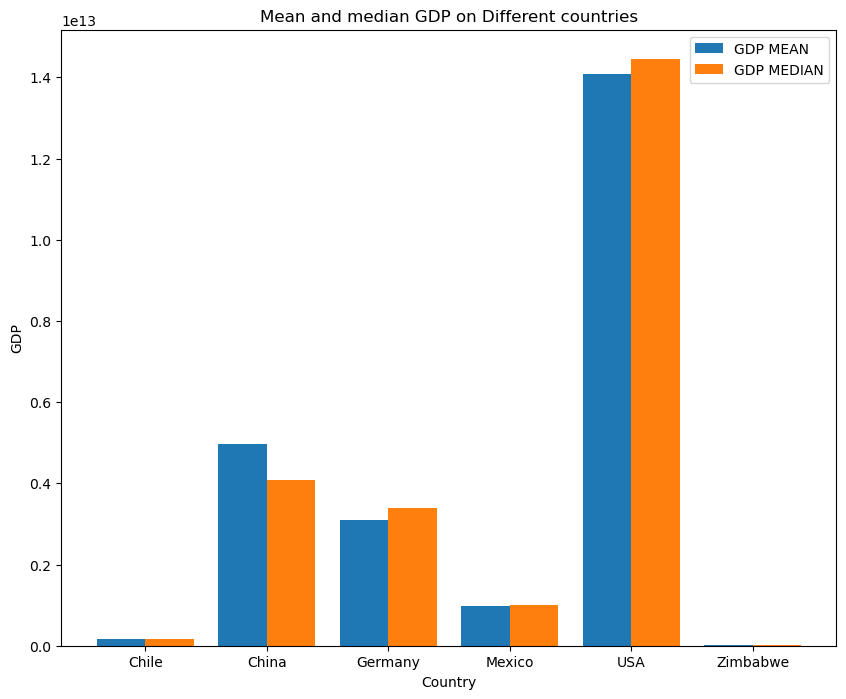

In [93]:
countries_mean = []
countries_median = []
countries_min = []
countries_max = []

for c in country_data:
    
#Create a list individually
    country = life[life['Country'] == c] 

    #calculate each countries mean and add it to countries_mean 
    country_mean = country['GDP'].mean()
    #add mean to countries_mean list
    countries_mean.append(country_mean)

    #calculate each countries median and add it to countries_median 
    country_median = country['GDP'].median()
    #add median to countries_median list
    countries_median.append(country_median)

    #calculate each countries min and add it to countries_min 
    country_min = country['GDP'].min()
    #add min to countries_min list
    countries_min.append(country_min)
    
    #calculate each countries max and add it to countries_max 
    country_max = country['GDP'].max()
    #add max to countries_max list
    countries_max.append(country_max)
    
    
    
    
#side by side bar plot function
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

plt.figure(figsize=(10, 8))
ax = plt.subplot()


#create mean and median bar for each country
mean_bars = create_x(2, 0.8, 1, 6)
plt.bar(mean_bars, countries_mean)
median_bars = create_x(2, 0.8, 2, 6)
plt.bar(median_bars, countries_median)

#Set x axis label to be name of each country
middle_x = [ (a + b) / 2.0 for a, b in zip(mean_bars, median_bars)]
ax.set_xticks(middle_x)
life_countires = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticklabels(life_countires)


plt.legend(['GDP MEAN', 'GDP MEDIAN'])
plt.title('Mean and median GDP on Different countries')
plt.xlabel('Country')
plt.ylabel('GDP')


plt.show()
plt.close()

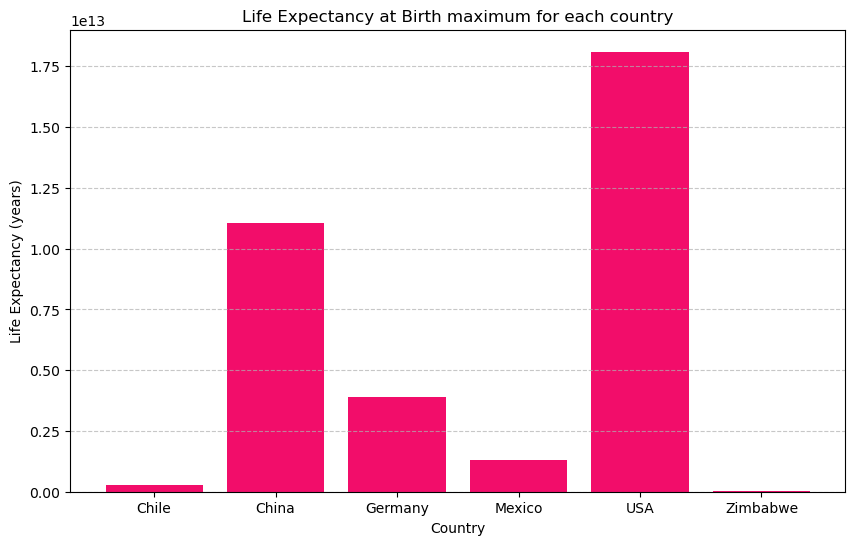

In [98]:
# Create a bar chart for GDP Max for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, countries_max, color='#f20d6a')

plt.title('Life Expectancy at Birth maximum for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

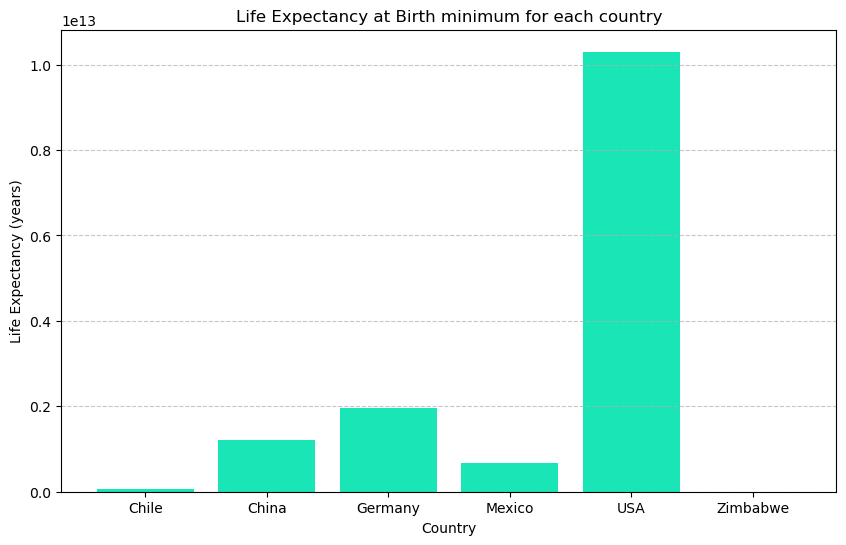

In [99]:
# Create a bar chart for GDP MIN for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, countries_min, color='#1ae5b6')

plt.title('Life Expectancy at Birth minimum for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

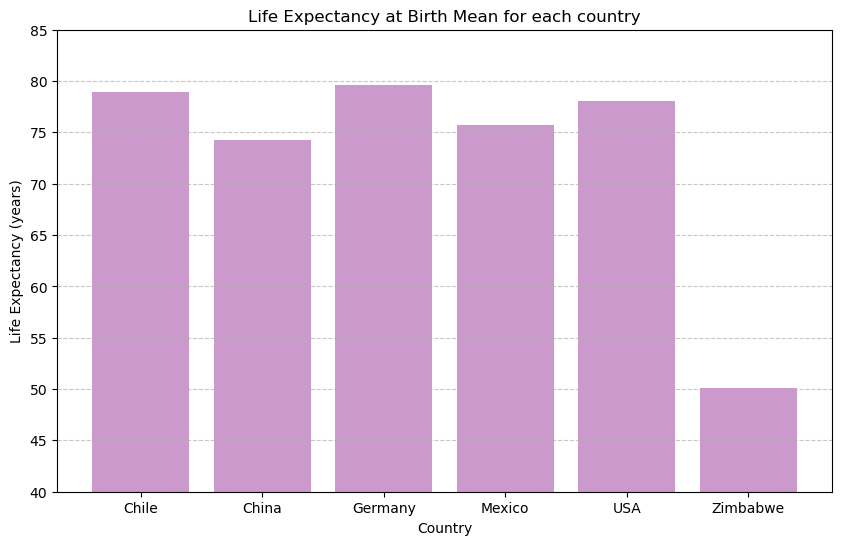

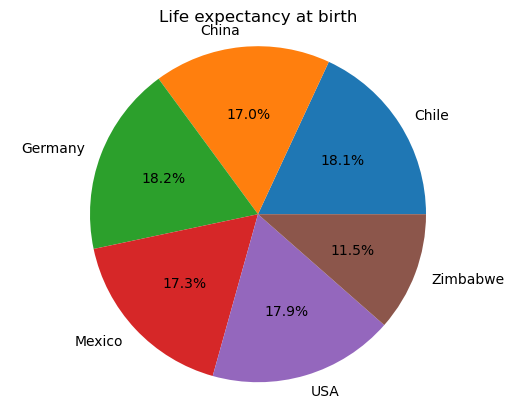

In [96]:
#calculating life expectancy at birth (leab) mean 
leab_mean = []
leab_min = []
leab_max = []

for l in country_data:
    
#Create a list individually
    country = life[life['Country'] == l] 

    #calculate each countries mean and add it to leab_mean
    expectancy_mean = country['Life expectancy at birth (years)'].mean()
    #add mean to leab_mean list
    leab_mean.append(expectancy_mean)
    
    #calculate each countries min and add it to leab_min
    expectancy_min = country['Life expectancy at birth (years)'].min()
    #add min to leab_min list
    leab_min.append(expectancy_min)
    
    #calculate each countries max and add it to leab_max
    expectancy_max = country['Life expectancy at birth (years)'].max()
    #add max to leab_max list
    leab_max.append(expectancy_max)

# Create a bar chart for life expectancy  Mean for each country
plt.figure(figsize=(10, 6))
plt.bar(life_countires, leab_mean, color='purple', alpha=0.4)


plt.title('Life Expectancy at Birth Mean for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(40, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

    
#plot a pie chart for life expectancy mean 
plt.pie(leab_mean, labels=life_countires, autopct='%0.1f%%')
plt.axis('equal') 

plt.title('Life expectancy at birth')
plt.show()
plt.close()

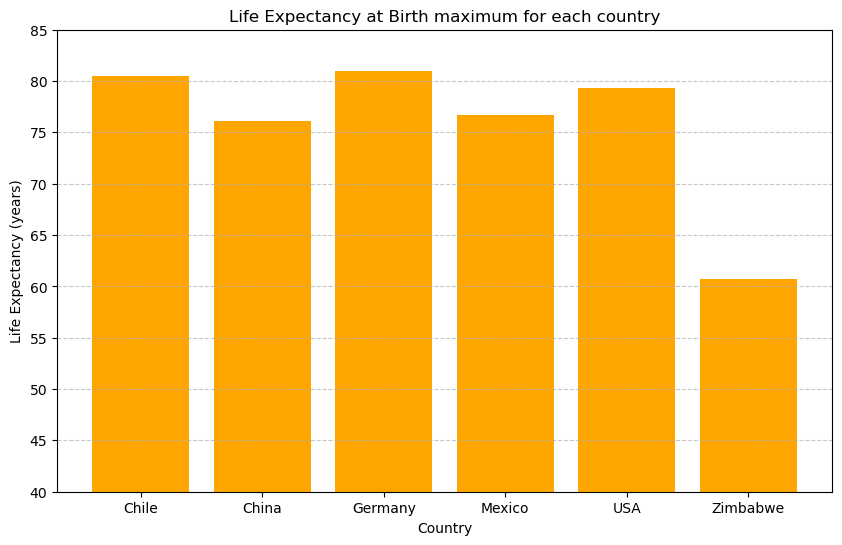

In [88]:
# Create a bar chart for life expectancy  Max for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, leab_max, color='orange')

plt.title('Life Expectancy at Birth maximum for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(40, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

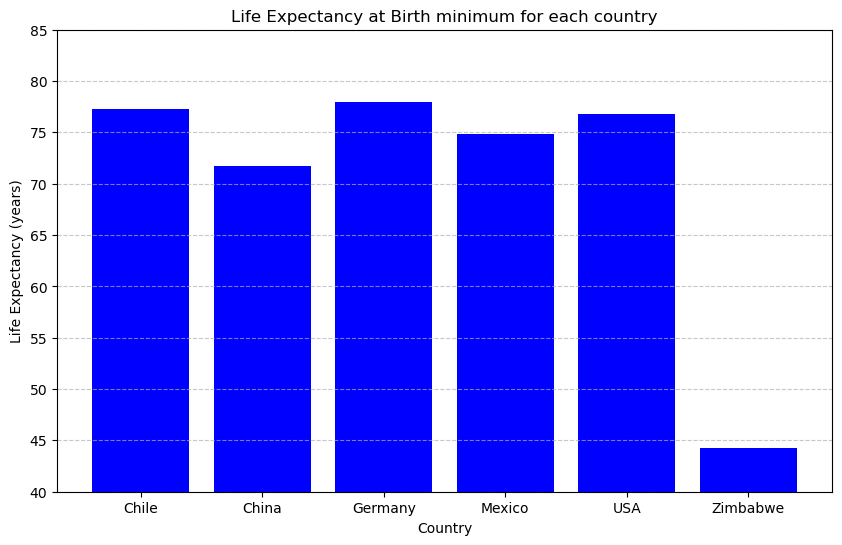

In [89]:
# Create a bar chart for life expectancy  Min for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, leab_min, color='blue')

plt.title('Life Expectancy at Birth minimum for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(40, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

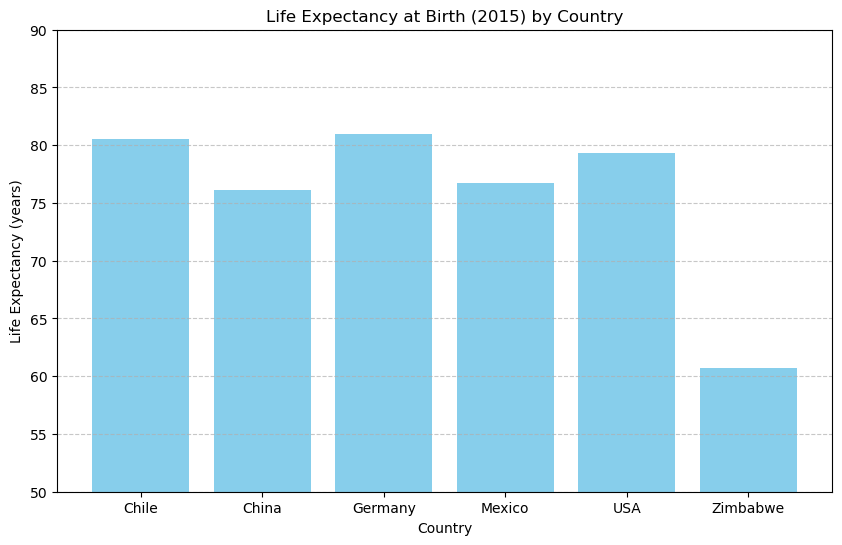

In [90]:
#life expectancy of 2015 list
leab_2015 = life[life['Year'] == 2015]['Life expectancy at birth (years)']

# Create a bar chart for 2015 life expectancy
plt.figure(figsize=(10, 6))
plt.bar(life_countires, leab_2015, color='skyblue')

plt.title('Life Expectancy at Birth (2015) by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(50, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()